# Bagging Implementation using Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Employees.csv')
df.head()

,EmployeeNumber,Age,Gender,Department,JobRole,Education,Experience,No. of Projects,PerformanceRating
0,1,41,Female,Sales,Sales Executive,2,8,6,3
1,2,49,Male,Research & Development,Research Scientist,1,10,10,4
2,4,37,Male,Research & Development,Laboratory Technician,2,7,9,3
3,5,33,Female,Research & Development,Research Scientist,4,8,8,3
4,7,27,Male,Research & Development,Laboratory Technician,1,6,2,3


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Education']=le.fit_transform(df['Education'])
df['Department']=le.fit_transform(df['Department'])
df['JobRole']=le.fit_transform(df['JobRole'])
df.head()

,EmployeeNumber,Age,Gender,Department,JobRole,Education,Experience,No. of Projects,PerformanceRating
0,1,41,0,2,7,1,8,6,3
1,2,49,1,1,6,0,10,10,4
2,4,37,1,1,2,1,7,9,3
3,5,33,0,1,6,3,8,8,3
4,7,27,1,1,2,0,6,2,3


In [4]:
df.isna().sum()

EmployeeNumber       0
Age                  0
Gender               0
Department           0
JobRole              0
Education            0
Experience           0
No. of Projects      0
PerformanceRating    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeNumber     1470 non-null   int64
 1   Age                1470 non-null   int64
 2   Gender             1470 non-null   int32
 3   Department         1470 non-null   int32
 4   JobRole            1470 non-null   int32
 5   Education          1470 non-null   int64
 6   Experience         1470 non-null   int64
 7   No. of Projects    1470 non-null   int64
 8   PerformanceRating  1470 non-null   int64
dtypes: int32(3), int64(6)
memory usage: 86.3 KB


In [7]:
df.describe()

,EmployeeNumber,Age,Gender,Department,JobRole,Education,Experience,No. of Projects,PerformanceRating
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,0.600000,1.260544,4.458503,1.912925,11.279592,7.014286,3.153741
std,602.024335,9.135373,0.490065,0.527792,2.461821,1.024165,7.780782,6.124013,0.360824
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,491.250000,30.000000,0.000000,1.000000,2.000000,1.000000,6.000000,3.000000,3.000000
50%,1020.500000,36.000000,1.000000,1.000000,5.000000,2.000000,10.000000,5.000000,3.000000
75%,1555.750000,43.000000,1.000000,2.000000,7.000000,3.000000,15.000000,9.000000,3.000000
max,2068.000000,60.000000,1.000000,2.000000,8.000000,4.000000,40.000000,40.000000,4.000000


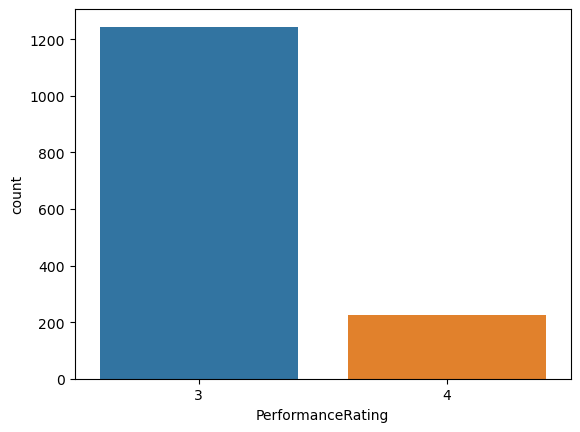

In [13]:
sns.countplot(data=df, x='PerformanceRating')
plt.show()

<Axes: >

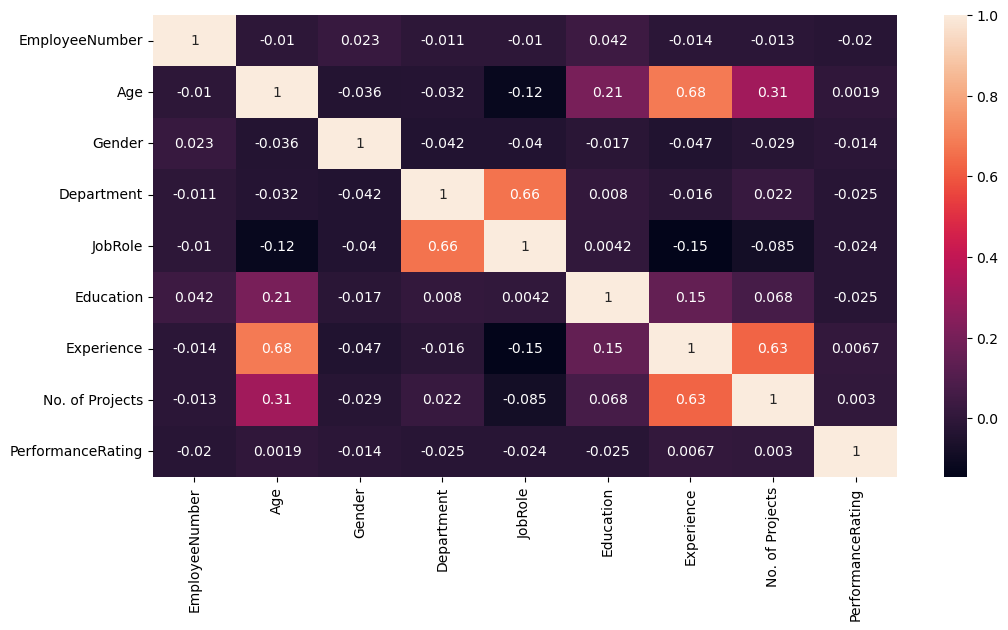

In [14]:
fig=plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [15]:
x=df.iloc[:,:-1]
x

,EmployeeNumber,Age,Gender,Department,JobRole,Education,Experience,No. of Projects
0,1,41,0,2,7,1,8,6
1,2,49,1,1,6,0,10,10
2,4,37,1,1,2,1,7,9
3,5,33,0,1,6,3,8,8
4,7,27,1,1,2,0,6,2
...,...,...,...,...,...,...,...,...
1465,2061,36,1,1,2,1,17,5
1466,2062,39,1,1,0,0,9,7
1467,2064,27,1,1,4,2,6,6
1468,2065,49,1,2,7,2,17,9


In [16]:
y=df.iloc[:,-1:]
y

,PerformanceRating
0,3
1,4
2,3
3,3
4,3
...,...
1465,3
1466,3
1467,4
1468,3


In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

# Build NB-Gaussian Model

In [34]:
from sklearn.naive_bayes import GaussianNB
gas =GaussianNB()
gas.fit(xtrain,ytrain)
print('training was completed')
print()
gaspred = gas.predict(xtest)
print('The predicted values is :\n',gaspred)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print()
accuracy_gas=accuracy_score(ytest,gaspred)
print('Accuracy Score:\t',accuracy_gas)
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,gaspred))
print()
print('Classification report :\n',classification_report(ytest,gaspred))

training was completed

The predicted values is :
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]

Accuracy Score:	 0.8537414965986394

Confusion Matrix:
 [[251   0]
 [ 43   0]]

Classification report :
               precision    recall  f1-score   support

           3       0.85      1.00      0.92       251
           4       0.00      0.00      0.00        43

    accuracy                           0.85       294
   macro avg       0.43     

C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: 

# Build NB-Multinomial Model

In [29]:
from sklearn.naive_bayes import MultinomialNB
mul =MultinomialNB()
mul.fit(xtrain,ytrain)
print('training was completed')
print()
mulpred = mul.predict(xtest)
print('The predicted values is :\n',mulpred)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print()
accuracy_mul = accuracy_score(ytest,mulpred)
print('Accuracy Score:\t',accuracy_mul)
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,mulpred))
print()
print('Classification report :\n',classification_report(ytest,mulpred))

training was completed

The predicted values is :
 [3 4 3 4 4 3 3 4 4 4 3 3 3 4 3 3 3 3 4 3 4 4 3 4 3 4 3 3 3 4 3 3 3 4 3 3 3
 3 4 3 4 3 3 3 3 4 3 3 4 3 4 4 4 3 3 3 4 3 3 3 3 3 3 4 3 4 4 3 3 3 3 4 4 4
 3 4 3 3 3 3 4 3 3 3 3 3 3 3 3 4 4 4 3 3 4 4 3 4 3 4 4 3 3 3 4 3 4 3 4 4 3
 3 3 3 3 4 4 4 3 3 3 3 3 3 4 3 3 3 4 4 3 3 4 3 3 3 3 3 3 4 3 4 3 4 3 3 4 3
 4 4 4 3 4 4 3 3 3 3 3 4 3 4 3 3 3 3 4 3 4 4 4 3 3 3 4 3 3 4 3 3 4 3 4 3 4
 3 3 4 3 3 3 4 3 3 3 3 3 4 3 4 3 3 3 4 4 4 4 3 3 4 3 3 3 3 3 4 4 3 3 3 4 3
 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 3 3 4 3 3 4 3 4 3 3 4 4 4 3 4 3 3 3
 3 3 3 3 3 3 4 4 4 4 3 4 3 3 4 3 3 3 3 3 3 3 3 3 3 4 3 3 3 4 3 3 3 3 3]

Accuracy Score:	 0.5748299319727891

Confusion Matrix:
 [[160  91]
 [ 34   9]]

Classification report :
               precision    recall  f1-score   support

           3       0.82      0.64      0.72       251
           4       0.09      0.21      0.13        43

    accuracy                           0.57       294
   macro avg       0.46     

C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Build NB-Bernoulli Model

In [35]:
from sklearn.naive_bayes import BernoulliNB
ber =BernoulliNB()
ber.fit(xtrain,ytrain)
print('training was completed')
print()
berpred = ber.predict(xtest)
print('The predicted values is :\n',berpred)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print()
accuracy_ber=accuracy_score(ytest,berpred)
print('Accuracy Score:\t',accuracy_ber)
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,berpred))
print()
print('Classification report :\n',classification_report(ytest,berpred))

training was completed

The predicted values is :
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]

Accuracy Score:	 0.8537414965986394

Confusion Matrix:
 [[251   0]
 [ 43   0]]

Classification report :
               precision    recall  f1-score   support

           3       0.85      1.00      0.92       251
           4       0.00      0.00      0.00        43

    accuracy                           0.85       294
   macro avg       0.43     

C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: 

# Ensemble Model:


# Bagging Calssifier    


In [23]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=gas,n_estimators=5,random_state=1)
bag.fit(xtrain,ytrain)
bagpred = bag.predict(xtest)
print('-'*100)
print('the predication of bag is:\n',bagpred)
print()
print('-'*100)
accuracy_bag = accuracy_score(ytest,bagpred)
print('Accuracy Score:\t',accuracy_bag)
print('-'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,bagpred))
print('-'*100)
print('Classification report :\n',classification_report(ytest,bagpred))

----------------------------------------------------------------------------------------------------
the predication of bag is:
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]

----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.8537414965986394
----------------------------------------------------------------------------------------------------
Confusion Matrix:
 [[251   0]
 [ 43

C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parame

# RandomForest Classifier Model

In [24]:
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators=10,random_state=1)
ran.fit(xtrain,ytrain)
ranpred = ran.predict(xtest)
print('-'*100)
print('the predication of bag is:\n',ranpred)
print()
print('-'*100)
accuracy_ran = accuracy_score(ytest,ranpred)
print('Accuracy Score:\t',accuracy_ran)
print('-'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ranpred))
print('-'*100)
print('Classification report :\n',classification_report(ytest,ranpred))

C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


----------------------------------------------------------------------------------------------------
the predication of bag is:
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]

----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.8367346938775511
----------------------------------------------------------------------------------------------------
Confusion Matrix:
 [[246   5]
 [ 43

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rand_for_1 = RandomForestClassifier(n_estimators=10, random_state=1, max_depth=None)
rand_for_1.fit(xtrain, ytrain)
ypred_rand_1 = rand_for_1.predict(xtest)
accuracy_rand_1 = accuracy_score(ytest, ypred_rand_1)
print("Accuracy Score:", accuracy_rand_1)
print()
print("Confusion Matrix:\n", confusion_matrix(ytest, ypred_rand_1))
print()
print("Classification Report:\n", classification_report(ytest, ypred_rand_1))

Accuracy Score: 0.8367346938775511

Confusion Matrix:
 [[246   5]
 [ 43   0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.85      0.98      0.91       251
           4       0.00      0.00      0.00        43

    accuracy                           0.84       294
   macro avg       0.43      0.49      0.46       294
weighted avg       0.73      0.84      0.78       294



C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


# ExtraTrees Classifier Model

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=10,bootstrap=True,verbose=2)

et.fit(xtrain,ytrain)
etpred = et.predict(xtest)
print('-'*100)
print('the predication of bag is:\n',etpred)
print()
print('-'*100)
accuracy_et = accuracy_score(ytest,etpred)
print('Accuracy Score:\t',accuracy_et)
print('-'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,etpred))
print('-'*100)
print('Classification report :\n',classification_report(ytest,etpred))

C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
----------------------------------------------------------------------------------------------------
the predication of bag is:
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]

----------------------------------------------------

# model with accuracy_score

In [36]:
from sklearn.metrics import accuracy_score
import pandas as pd


scores = [
    ('Gaussian_NB', accuracy_gas),
    ('Multinomial NB', accuracy_mul),
    ('Bernoulli NB', accuracy_ber),
    ('Bagging classifier', accuracy_bag),
    ('RandomForest Classifier', accuracy_ran),
    ('RandomForest Classifier with pruning', accuracy_rand_1),
    ('ExtraTrees Classifier', accuracy_et)
]


Acc_scores = pd.DataFrame(scores, columns=['Model', 'Accuracy_score'])


print(Acc_scores.sort_values(by='Accuracy_score', ascending=False))

                                  Model  Accuracy_score
0                           Gaussian_NB        0.853741
2                          Bernoulli NB        0.853741
3                    Bagging classifier        0.853741
6                 ExtraTrees Classifier        0.840136
4               RandomForest Classifier        0.836735
5  RandomForest Classifier with pruning        0.836735
1                        Multinomial NB        0.574830


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Gaussian_NB'),
  Text(1, 0, 'Multinomial NB'),
  Text(2, 0, 'Bernoulli NB'),
  Text(3, 0, 'Bagging classifier'),
  Text(4, 0, 'RandomForest Classifier'),
  Text(5, 0, 'RandomForest Classifier with pruning'),
  Text(6, 0, 'ExtraTrees Classifier')])

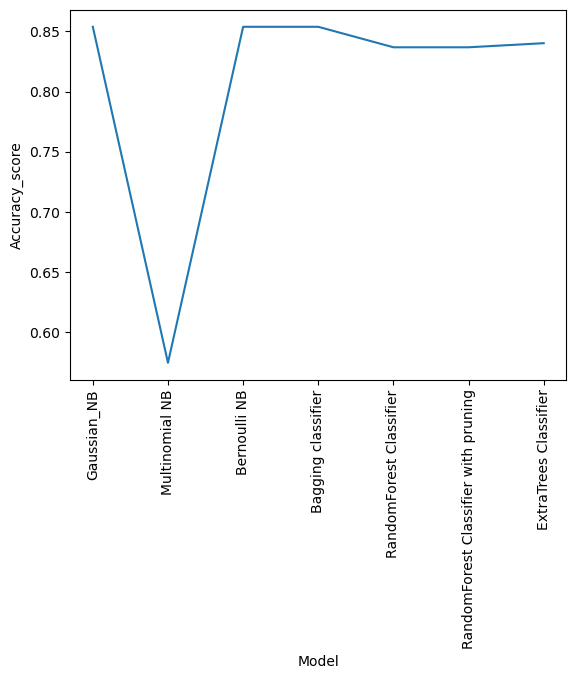

In [37]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'],data=Acc_scores)
plt.xticks(rotation=90)

# Bagging Implementation using Regression

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=42)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (1102, 8)

Training data-y- Shape:	 (1102, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (368, 8)

Testing data(y-Outcome) Shape:	 (368, 1)


# Linear Regression Model


In [39]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print('Training Started...\n')
print()
lin_reg.fit(xtrain,ytrain)
print()
print('Training Completed.....\n')
print()
print('Testing invoked....\n')
ypred=lin_reg.predict(xtest)
print('Predict Total Payment\n',ypred)
print('\n Testing is also Completed...\n')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(ytest,ypred))
print()
print('RMSE: \t', np. sqrt (mean_squared_error(ytest,ypred)))
print()
print('Variance Score:\t', explained_variance_score(ytest,ypred))
print()
print('R-Square: \t', r2_score(ytest,ypred))

Training Started...



Training Completed.....


Testing invoked....

Predict Total Payment
 [[3.13458312]
 [3.15574481]
 [3.1536526 ]
 [3.23680575]
 [3.18947905]
 [3.14984267]
 [3.16142634]
 [3.16365709]
 [3.17030082]
 [3.18756583]
 [3.11470222]
 [3.12823354]
 [3.15672732]
 [3.15733728]
 [3.13636428]
 [3.1221133 ]
 [3.1512955 ]
 [3.14513614]
 [3.14527991]
 [3.14242855]
 [3.18121543]
 [3.2001168 ]
 [3.12026688]
 [3.16275111]
 [3.13223587]
 [3.1047315 ]
 [3.15002824]
 [3.14753891]
 [3.12056944]
 [3.16852812]
 [3.13937146]
 [3.16406169]
 [3.15529553]
 [3.1728124 ]
 [3.14187406]
 [3.14041575]
 [3.16528479]
 [3.14763351]
 [3.17197954]
 [3.12209732]
 [3.16457082]
 [3.12839555]
 [3.13078327]
 [3.14695425]
 [3.15157115]
 [3.18127669]
 [3.12712734]
 [3.15313833]
 [3.18302403]
 [3.14953204]
 [3.21898628]
 [3.16059437]
 [3.17167691]
 [3.13838995]
 [3.13370102]
 [3.15465615]
 [3.19783369]
 [3.1289652 ]
 [3.17839904]
 [3.1243257 ]
 [3.12692989]
 [3.15467231]
 [3.12023385]
 [3.21753504]
 [3.1933811

In [57]:
Accuracy_lin_reg=r2_score(ytest,ypred_lin_reg)
MSE_lin_reg=mean_squared_error(ytest,ypred_lin_reg)
RMSE_lin_reg=np.sqrt(mean_squared_error(ytest,ypred_lin_reg))
print('Accuracy Score - Linear Regression:\t',Accuracy_lin_reg)
print()
print('MSE-linear Regression:\t',MSE_lin_reg)
print()
print('RMSE linear Regression:\t',RMSE_lin_reg)

Accuracy Score - Linear Regression:	 -0.021344478370646458

MSE-linear Regression:	 0.12983256435455073

RMSE linear Regression:	 0.36032286127104224


# KNN Regression

In [46]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor(n_neighbors=3)
print('*'*100)
print('KNN Regression Model')
print('*'*100)
print('\n Training Phase')
knn_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',knn_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_knn=knn_reg.predict(xtest)
print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('KNN Regression - Performance Measures')
print('*'*100)
Accuracy_knn_reg=r2_score(ytest,ypred_knn)
MSE_knn=mean_squared_error(ytest,ypred_knn)
RMSE_knn=np.sqrt(mean_squared_error(ytest,ypred_knn))
print('Accuracy Score - knn Regression:\t',Accuracy_knn_reg)
print()
print('MSE-knn Regression:\t',MSE_knn)
print()
print('RMSE knn Regression:\t',RMSE_knn)

****************************************************************************************************
KNN Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Training Completed

 Test Phase
Predicted values for the test samples:
 [[3.13458312]
 [3.15574481]
 [3.1536526 ]
 [3.23680575]
 [3.18947905]
 [3.14984267]
 [3.16142634]
 [3.16365709]
 [3.17030082]
 [3.18756583]
 [3.11470222]
 [3.12823354]
 [3.15672732]
 [3.15733728]
 [3.13636428]
 [3.1221133 ]
 [3.1512955 ]
 [3.14513614]
 [3.14527991]
 [3.14242855]
 [3.18121543]
 [3.2001168 ]
 [3.12026688]
 [3.16275111]
 [3.13223587]
 [3.1047315 ]
 [3.15002824]
 [3.14753891]
 [3.12056944]
 [3.16852812]
 [3.13937146]
 [3.16406169]
 [3.15529553]
 [3.1728124 ]
 [3.14187406]
 [3.14041575]
 [3.16528479]
 [3.

# Decision Tree Regression model

In [56]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
print('*'*100)
print('DT Regression Model')
print('*'*100)
print('\n Training Phase')
dt_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_dt_reg=dt_reg.predict(xtest)
print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Linear Regression - Performance Measures')
print('*'*100)
Accuracy_dt_reg=r2_score(ytest,ypred_dt_reg)
MSE_dt_reg=mean_squared_error(ytest,ypred_dt_reg)
RMSE_dt_reg=np.sqrt(mean_squared_error(ytest,ypred_dt_reg))
print('Accuracy Score - DT Regression:\t',Accuracy_dt_reg)
print()
print('MSE-DT Regression:\t',MSE_dt_reg)
print()
print('RMSE DT Regression:\t',RMSE_dt_reg)

****************************************************************************************************
DT Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted values for the test samples:
 [[3.13458312]
 [3.15574481]
 [3.1536526 ]
 [3.23680575]
 [3.18947905]
 [3.14984267]
 [3.16142634]
 [3.16365709]
 [3.17030082]
 [3.18756583]
 [3.11470222]
 [3.12823354]
 [3.15672732]
 [3.15733728]
 [3.13636428]
 [3.1221133 ]
 [3.1512955 ]
 [3.14513614]
 [3.14527991]
 [3.14242855]
 [3.18121543]
 [3.2001168 ]
 [3.12026688]
 [3.16275111]
 [3.13223587]
 [3.1047315 ]
 [3.15002824]
 [3.14753891]
 [3.12056944]


# Support Vector Regressor

In [58]:
from sklearn.svm import SVR
svr=SVR()
print('*'*100)
print('SVR Regression Model')
print('*'*100)
print('\n Training Phase')
svr.fit(xtrain,ytrain)
print('Hyperparameter:\n',svr.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_svr=svr.predict(xtest)
print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('SVR Regression - Performance Measures')
print('*'*100)
Accuracy_svr=r2_score(ytest,ypred_svr)
MSE_svr=mean_squared_error(ytest,ypred_svr)
RMSE_svr=np.sqrt(mean_squared_error(ytest,ypred_svr))
print('Accuracy Score - SVR Regression:\t',Accuracy_svr)
print()
print('MSE-SVR Regression:\t',MSE_svr)
print()
print('RMSE SVR Regression:\t',RMSE_svr)

****************************************************************************************************
SVR Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Training Completed

 Test Phase
Predicted values for the test samples:
 [[3.13458312]
 [3.15574481]
 [3.1536526 ]
 [3.23680575]
 [3.18947905]
 [3.14984267]
 [3.16142634]
 [3.16365709]
 [3.17030082]
 [3.18756583]
 [3.11470222]
 [3.12823354]
 [3.15672732]
 [3.15733728]
 [3.13636428]
 [3.1221133 ]
 [3.1512955 ]
 [3.14513614]
 [3.14527991]
 [3.14242855]
 [3.18121543]
 [3.2001168 ]
 [3.12026688]
 [3.16275111]
 [3.13223587]
 [3.1047315 ]
 [3.15002824]
 [3.14753891]
 [3.12056944]
 [3.16852812]
 [3.13937146]
 [3.16406169]
 [3.15529553]
 [3.1728124 ]
 [3.14187406]
 [3.14

C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Boosting - Adaboost with the base model - Linreg

In [51]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=lin_reg,n_estimators=15)
print('*'*100)
print('AdaBoost Regression Model')
print('*'*100)
print('\n Training Phase')
ada.fit(xtrain,ytrain)
print('Hyperparameter:\n',ada.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_ada=ada.predict(xtest)
print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Adaboost Regression - Performance Measures')
print('*'*100)
Accuracy_ada=r2_score(ytest,ypred_ada)
MSE_ada=mean_squared_error(ytest,ypred_ada)
RMSE_ada=np.sqrt(mean_squared_error(ytest,ypred_ada))
print('Accuracy Score - Adaboost Regression:\t',Accuracy_ada)
print()
print('MSE-Adaboost Regression:\t',MSE_ada)
print()
print('RMSE Adaboost Regression:\t',RMSE_ada)

****************************************************************************************************
AdaBoost Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'base_estimator__copy_X': True, 'base_estimator__fit_intercept': True, 'base_estimator__n_jobs': None, 'base_estimator__positive': False, 'base_estimator': LinearRegression(), 'estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 15, 'random_state': None}
Training Completed

 Test Phase
Predicted values for the test samples:
 [[3.13458312]
 [3.15574481]
 [3.1536526 ]
 [3.23680575]
 [3.18947905]
 [3.14984267]
 [3.16142634]
 [3.16365709]
 [3.17030082]
 [3.18756583]
 [3.11470222]
 [3.12823354]
 [3.15672732]
 [3.15733728]
 [3.13636428]
 [3.1221133 ]
 [3.1512955 ]
 [3.14513614]
 [3.14527991]
 [3.14242855]
 [3.18121543]
 [3.2001168 ]
 [3.12026688]
 [3.16275111]
 [3.13223587]
 [3.1047315 ]
 [3.15002824]
 [3.147538

C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# Boosting - GradientBoost

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
grad_boost=GradientBoostingRegressor(n_estimators=15)
print('*'*100)
print('GradientBoosting Regression Model')
print('*'*100)
print('\n Training Phase')
grad_boost.fit(xtrain,ytrain)
print('Hyperparameter:\n',grad_boost.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_grad_boost=grad_boost.predict(xtest)
print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('GradientBoosting Regression - Performance Measures')
print('*'*100)
Accuracy_grad_boost=r2_score(ytest,ypred_grad_boost)
MSE_grad_boost=mean_squared_error(ytest,ypred_grad_boost)
RMSE_grad_boost=np.sqrt(mean_squared_error(ytest,ypred_grad_boost))
print('Accuracy Score - GradientBoosting Regression:\t',Accuracy_grad_boost)
print()
print('MSE-GradientBoosting Regression:\t',MSE_grad_boost)
print()
print('RMSE GradientBoosting Regression:\t',RMSE_grad_boost)

****************************************************************************************************
GradientBoosting Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Training Completed

 Test Phase
Predicted values for the test samples:
 [[3.13458312]
 [3.15574481]
 [3.1536526 ]
 [3.23680575]
 [3.18947905]
 [3.14984267]
 [3.16142634]
 [3.16365709]
 [3.17030082]
 [3.18756583]
 [3.11470222]
 [3.12823354]
 [3.15672732]
 [3.15733728]
 [3

C:\Users\Uday\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Model with Accuracy scores

In [53]:
scores=[('Linear Regression',Accuracy_lin_reg),
 ('KNN Regression',Accuracy_knn_reg),
 ('Decision Tree Regression',Accuracy_dt_reg),
 ('SVR',Accuracy_svr),
 ('Adaboost Regressor',Accuracy_ada),
 ('Gradient Boost Regressor',Accuracy_grad_boost),
 
 ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))


                      Model  Accuracy_score
5  Gradient Boost Regressor       -0.011595
3                       SVR       -0.019384
0         Linear Regression       -0.021344
4        Adaboost Regressor       -0.021533
1            KNN Regression       -0.382360
2  Decision Tree Regression       -1.009410


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'KNN Regression'),
  Text(2, 0, 'Decision Tree Regression'),
  Text(3, 0, 'SVR'),
  Text(4, 0, 'Adaboost Regressor'),
  Text(5, 0, 'Gradient Boost Regressor')])

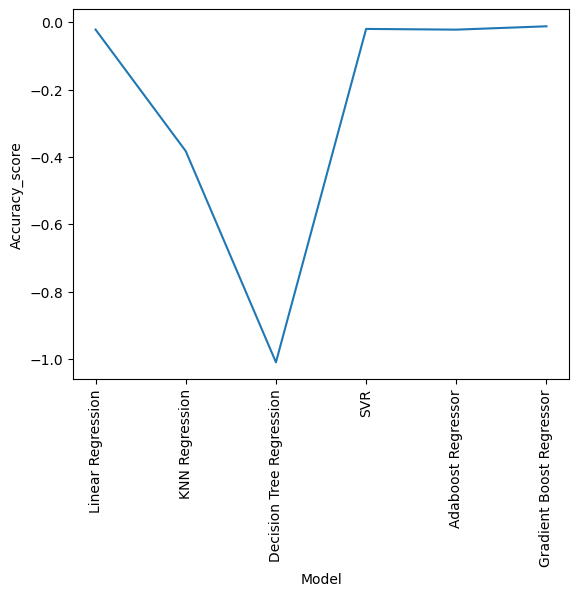

In [55]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'],data=Acc_scores)z
plt.xticks(rotation=90)
